In [43]:
%load_ext autoreload
%autoreload 2

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from src.classes import *
import time

import seaborn as sns
sns.set(style="whitegrid", palette="deep", color_codes=True)

# Colors
Scol = "#07D5E6"
Ecol = "#FFD700"
Icol = "#FB9214"
Rcol = "#3B7548"
Dcol = "#EA1313"
Ccol = "#123456"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Pneumonic plague in Madagascar

0.07852312576372844 0.9604733124104838


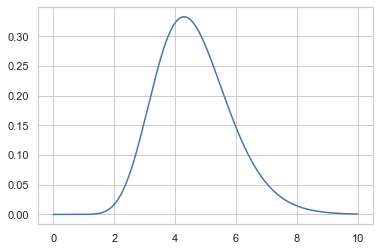

In [26]:
# Incubation process
# "They typically start about three to seven days after exposure" - Wiki https://en.wikipedia.org/wiki/Pneumonic_plague
incubation_process = ss.erlang(14, scale=0.33)
x = np.linspace(0,10,10000)
plt.plot(x,incubation_process.pdf(x))
print( incubation_process.cdf(3), incubation_process.cdf(7),  )

0.01898815687615381 0.995084132734071


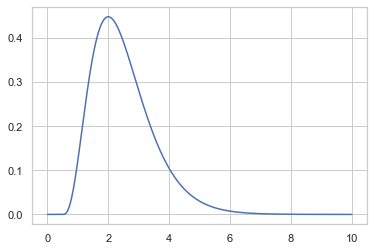

In [33]:
# Death may follow in one to six days" https://en.wikipedia.org/wiki/Plague_(disease)#Pneumonic_plague
death_process = ss.erlang(4, scale=0.5, loc=0.5)
x = np.linspace(0,10,10000)
plt.plot(x,death_process.pdf(x))
print( death_process.cdf(1), death_process.cdf(6),  )

0.011164780271550276 0.8427579727616085


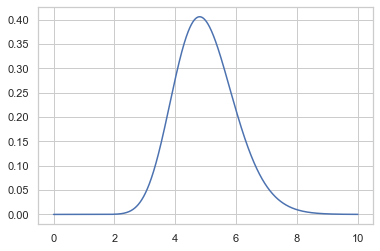

In [42]:
# Recovery process
#With treatment, most turn the corner within about 3 days, and treatment is continued for 7 to 10 days. 
# - https://www.drgreene.com/articles/plague
# Death may follow in one to six days" https://en.wikipedia.org/wiki/Plague_(disease)#Pneumonic_plague
recovery_process = ss.erlang(25, scale=0.2 )
x = np.linspace(0,10,10000)
plt.plot(x,recovery_process.pdf(x))
print( recovery_process.cdf(3), recovery_process.cdf(6), )

In [ ]:
# https://en.wikipedia.org/wiki/21st_century_Madagascar_plague_outbreaks

Started Aug. 23 https://www.livescience.com/60715-plague-outbreak-madagascar.html

By the time the outbreak was detected, on Sept. 11

In [126]:
recovery_process.mean()

5.0

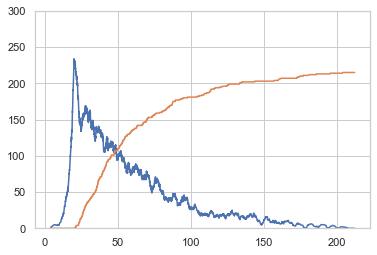

In [146]:
np.random.seed(2)

res = list()

for i in range(100):
    plague_model = Plague_SEIRD(
        1.7,
        incubation_process,
        recovery_process,
        death_process,
        init_exposed=1,
        population=1_610_000,
        beta_change=20,
        new_beta=0.18,
        prob_dead=0.1
    )
    history = [(time, S, E, I, R, D, C) for __, time, (S, E, I, R, D, C) in plague_model.run_until(365) ]
    res.append(plague_model.state[5])
    
plt.ylim(0,300)
time, S, E, I, R, D, C = zip(*history)
# plt.plot(time, S)
plt.plot(time, E)
# plt.plot(time, I)
# plt.plot(time, R)
plt.plot(time, D)

plt.show()

In [147]:
np.mean(res)

2044.42

In [148]:
plague_model.event_list

[]

In [92]:
plague_model.state

State(S=1609382, E=0, I=0, R=550, D=68, C=618)